In [102]:
import boto3
from IPython.display import Image, display
#from trp import Document
from PIL import Image as PImage, ImageDraw
import time
from IPython.display import IFrame

In [103]:
# Curent AWS Region. Use this to choose corresponding S3 bucket with sample content

mySession = boto3.session.Session()
awsRegion = mySession.region_name

In [104]:
# S3 bucket that contains sample documents

# We are providing sample documents in this bucket so
# you do not have to manually download/upload test documents.

s3BucketName = "aws-workshops-" + awsRegion
s3BucketName ="sagemaker-us-east-1-135151577600"

In [105]:
# Amazon S3 client
s3 = boto3.client('s3')

# Amazon Textract client
textract = boto3.client('textract')

# 1. Detect text from local image

https://docs.aws.amazon.com/textract/latest/dg/API_DetectDocumentText.html

In [106]:
# # Document
# documentName = "simple-document-image.jpg"

In [107]:
# display(Image(filename=documentName))

In [108]:
# # Read document content
# with open(documentName, 'rb') as document:
#     imageBytes = bytearray(document.read())

# # Call Amazon Textract
# response = textract.detect_document_text(Document={'Bytes': imageBytes})

# # Print detected text
# for item in response["Blocks"]:
#     if item["BlockType"] == "LINE":
#         print (item["Text"])

# 2. Detect text from S3 object

https://docs.aws.amazon.com/textract/latest/dg/API_DetectDocumentText.html

In [109]:
# Document
documentName = "DL.jpg"

In [110]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [44]:
# Call Amazon Textract
response = textract.detect_document_text(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    })


# Print detected text
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print (item["Text"])

Driver's Licence
Ontario
ON
Permis de conduire
CANADA
1,2 NAME) NOM
SINGH
AMANVEER
8 45 CHARLESWOOD CIR
BRAMPTON, ON, L7A 1Z1
4d NUMBER/
NÚMERO
S4490 - 03607 - 60914
4a ISS/DEL
2017/07/04
4b EXPJEXP. 2022/09/14
5 DD/REF
DV4972Z74
16 HGT/HAUT. 169 cm
X
15 SEX) SEXE
M
9 CLASS
G
CATEG
know am
12 REST.)
Sat
COND
3 DOB/DON
1976/09/14


## Lines and Words of Text - JSON Structure

https://docs.aws.amazon.com/textract/latest/dg/API_BoundingBox.html

https://docs.aws.amazon.com/textract/latest/dg/text-location.html

https://docs.aws.amazon.com/textract/latest/dg/how-it-works-lines-words.html

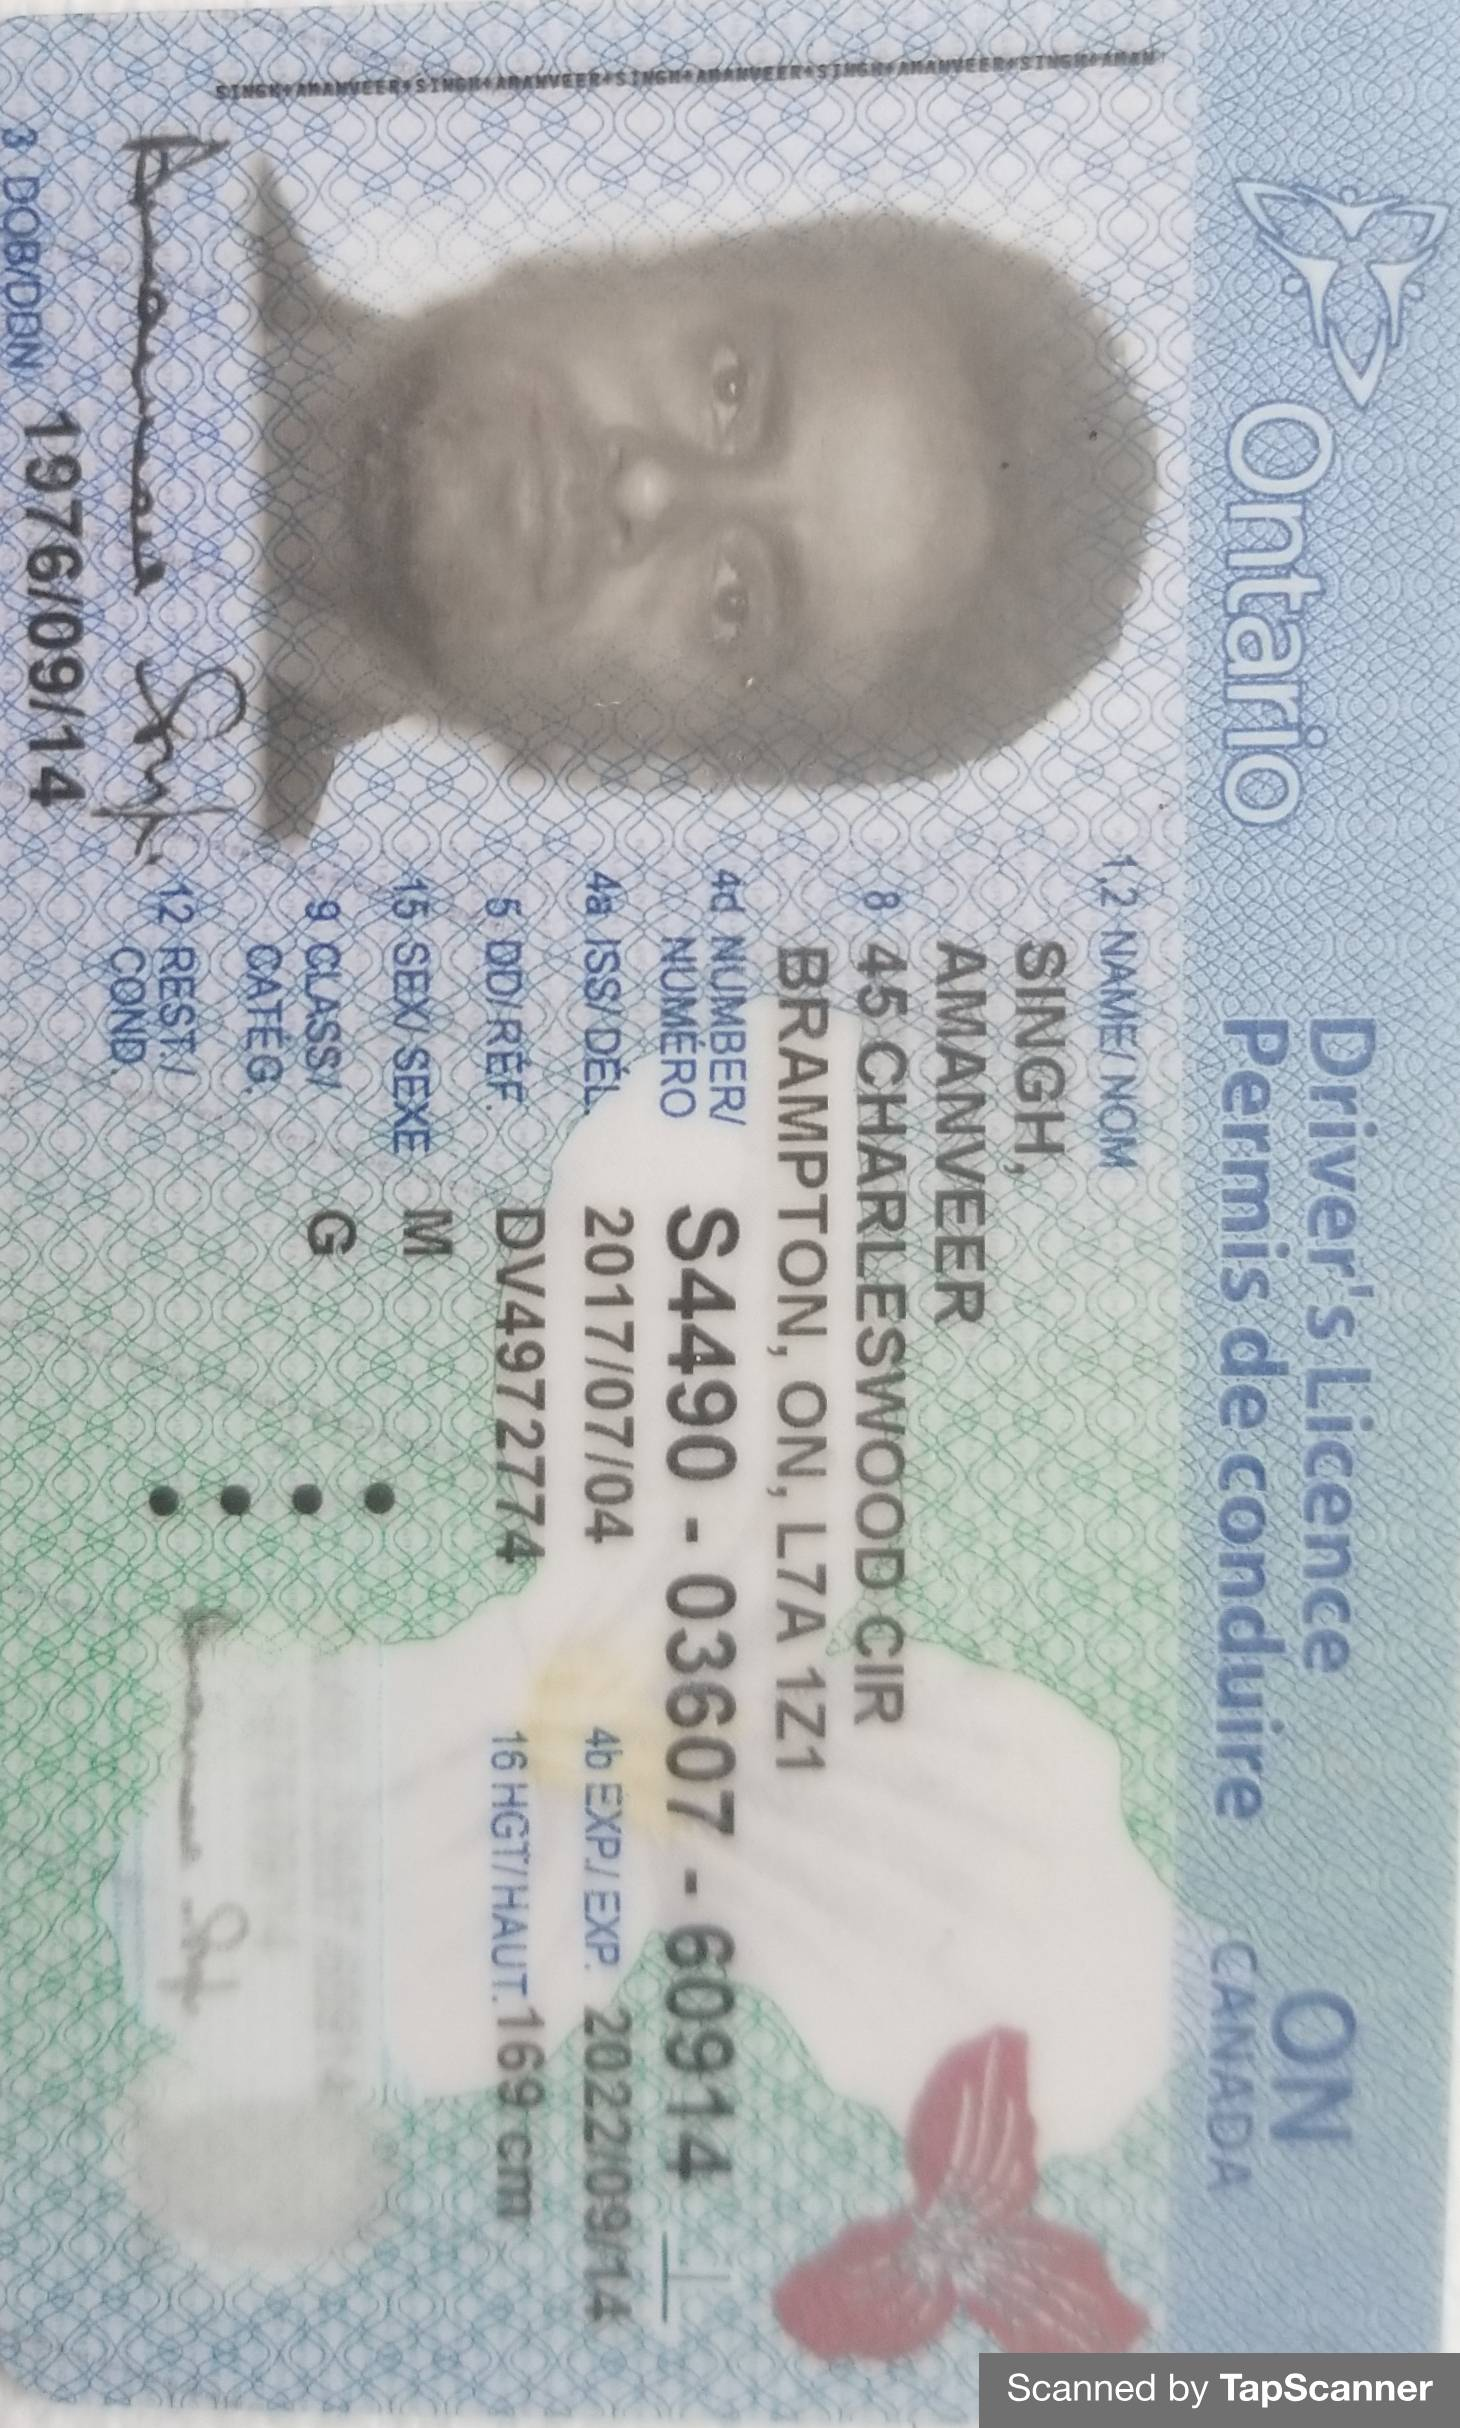

Driver's Licence
Ontario
ON
Permis de conduire
CANADA
1,2 NAME) NOM
SINGH
AMANVEER
8 45 CHARLESWOOD CIR
BRAMPTON, ON, L7A 1Z1
4d NUMBER/
NÚMERO
S4490 - 03607 - 60914
4a ISS/DEL
2017/07/04
4b EXPJEXP. 2022/09/14
5 DD/REF
DV4972Z74
16 HGT/HAUT. 169 cm
X
15 SEX) SEXE
M
9 CLASS
G
CATEG
know am
12 REST.)
Sat
COND
3 DOB/DON
1976/09/14


In [54]:
# Document
documentName = "DL.jpg"
display(Image(filename=documentName))
# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.detect_document_text(Document={'Bytes': imageBytes})

# Print detected text
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print (item["Text"])

In [55]:
print("JSON Response\n===================")
display(response)

JSON Response


{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 0.9984920024871826,
     'Left': 0.0,
     'Top': 0.0015079739969223738},
    'Polygon': [{'X': 1.0, 'Y': 0.0015079739969223738},
     {'X': 1.0, 'Y': 1.0},
     {'X': 0.0, 'Y': 1.0},
     {'X': 0.0, 'Y': 0.0019546637777239084}]},
   'Id': 'f191fd8a-5765-4e81-ba5c-f96cc5cc0a00',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['bf12b012-bfc3-4056-9199-7399a4b0d4bb',
      '056cc782-56ec-4aa3-8ecf-6a743de0273d',
      'c577836b-3193-42ab-be21-7de12f5a6767',
      '902eb6a4-f281-47de-b5a5-8fa12d83ab3b',
      '3b8519dc-19f4-45fa-956a-71ec3936b94e',
      'e8aaecd6-3a72-4409-a328-a82da927a7db',
      'd426f5f4-5cae-4d4d-b39b-1ae12a967ee1',
      'e38d6b24-3637-48f0-9e43-3ca13d835992',
      'b806bf93-d214-4583-8acb-ebfe910102f7',
      'ff1b8938-2d76-4b11-8c93-0a61849c92bf',
      '3635001f-6380-4ad1-aab4-f198970dc1fb',
      '0bf172e7-4bc5-416e-a949-e5e8c5b

# 3. Reading order

In [56]:
# Document
documentName = "DL.jpg"

In [57]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [58]:
# Call Amazon Textract
response = textract.detect_document_text(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    })

#print(response)

# Detect columns and print lines
columns = []
lines = []
for item in response["Blocks"]:
      if item["BlockType"] == "LINE":
        column_found=False
        for index, column in enumerate(columns):
            bbox_left = item["Geometry"]["BoundingBox"]["Left"]
            bbox_right = item["Geometry"]["BoundingBox"]["Left"] + item["Geometry"]["BoundingBox"]["Width"]
            bbox_centre = item["Geometry"]["BoundingBox"]["Left"] + item["Geometry"]["BoundingBox"]["Width"]/2
            column_centre = column['left'] + column['right']/2

            if (bbox_centre > column['left'] and bbox_centre < column['right']) or (column_centre > bbox_left and column_centre < bbox_right):
                #Bbox appears inside the column
                lines.append([index, item["Text"]])
                column_found=True
                break
        if not column_found:
            columns.append({'left':item["Geometry"]["BoundingBox"]["Left"], 'right':item["Geometry"]["BoundingBox"]["Left"] + item["Geometry"]["BoundingBox"]["Width"]})
            lines.append([len(columns)-1, item["Text"]])

lines.sort(key=lambda x: x[0])
for line in lines:
    print (line[1])

Driver's Licence
ON
Ontario
Permis de conduire
CANADA
1,2 NAME) NOM
SINGH
AMANVEER
8 45 CHARLESWOOD CIR
BRAMPTON, ON, L7A 1Z1
4d NUMBER/
NÚMERO
S4490 - 03607 - 60914
4a ISS/DEL
2017/07/04
4b EXPJEXP. 2022/09/14
5 DD/REF
DV4972Z74
16 HGT/HAUT. 169 cm
X
M
15 SEX) SEXE
9 CLASS
G
CATEG
know am
12 REST.)
Sat
COND
3 DOB/DON
1976/09/14


# 4. Natural Language Processing

In [59]:
# Document
documentName = "textract/SampleLiabilityInsuranceForm.png"

In [60]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [64]:
# Call Amazon Textract
response = textract.detect_document_text(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    })

#print(response)

# Print text
print("\nText\n========")
text = ""
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print ('\033[94m' +  item["Text"] + '\033[0m')
        text = text + " " + item["Text"]

# Amazon Comprehend client
comprehend = boto3.client('comprehend')

# Detect sentiment
sentiment =  comprehend.detect_sentiment(LanguageCode="en", Text=text)
print ("\nSentiment\n========\n{}".format(sentiment.get('Sentiment')))

# Detect entities
entities =  comprehend.detect_entities(LanguageCode="en", Text=text)
print("\nEntities\n========")
for entity in entities["Entities"]:
    print ("{}\t=>\t{}".format(entity["Type"], entity["Text"]))


Text
ACORD. CERTIFICATE OF LIABILITY INSURANCE
DATE MM cory
00/00/00
PRODUCER
THIS CERTIFICATE is ISSULD AS A MATTER OF INFORMATION
Your Agent or Broker
ONLY AND CONFERS NO RIGHTS UPON THE CERTIFICATE
HOLDER THIS CERTIFICATE DOES NOT AMEND. EXTEND OR
ALTER THE COVERAGE AFFORDED BY THE POLICIES BELOW
Address
City, State Zip
INSURERS AFFORDING COVERAGE
INSURED
Your Company Name
INSURERA
Your insurance Company
INSURER @
Address
INSURERC
City, State Zip
INSURER D:
INSURER
COVERAGES
THE POLICIES OF INSURANCE LISTED BELOW HAVE BEEN ISSUED TO THE INSURED NAMED ABOVE FOR THE POLICY PERIOD INDICATED NOTWITHST ANDING
ANY REGUIREMENT TERM OR CONDITION OF ANY CONTRACT OR OTHER DOCUMENT WITH RESPECT TO WHICH THIS CERTIFICATE MAY st ISSUED OR
MAY
PERT. AIN. THE INSURANCE AFFORDED BY THE POLICHS DESCRIBED HEREN is SUBJECT TO ALL THE TERMS EXCLUSIONS AND CONDITIONS OF SUCH
POLICIES AGGREGATE LIMITS SHOWN MAY HAVE BEEN REDUCED BY PAID CLAIMS
INSURANCE
POLIOY NUMBER
BATE
LIMITS
A
GENERAL
Your Policy No

# 5. Translate

In [68]:
# Document
documentName = "textract/SampleLiabilityInsuranceForm.png"

In [69]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [72]:
# Call Amazon Textract
response = textract.detect_document_text(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    })

#print(response)

# Amazon Translate client
translate = boto3.client('translate')

print ('')
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print ('\033[94m' +  item["Text"] + '\033[0m')
        result = translate.translate_text(Text=item["Text"], SourceLanguageCode="en", TargetLanguageCode="fr")
        print ('\033[92m' + result.get('TranslatedText') + '\033[0m')
    print ('')



ACORD. CERTIFICATE OF LIABILITY INSURANCE
ACORD. CERTIFICAT D'ASSURANCE RESPONSABILITÉ

DATE MM cory
DATE MM cory

00/00/00
00/00/00

PRODUCER
PRODUCTEUR

THIS CERTIFICATE is ISSULD AS A MATTER OF INFORMATION
CE CERTIFICAT EST ISSULD EN TANT QUE QUESTION D'INFORMATION

Your Agent or Broker
Votre agent ou courtier

ONLY AND CONFERS NO RIGHTS UPON THE CERTIFICATE
SEULEMENT ET NE CONFÈRE AUCUN DROIT SUR LE CERTIFICAT

HOLDER THIS CERTIFICATE DOES NOT AMEND. EXTEND OR
TITULAIRE DE CE CERTIFICAT NE MODIFIE PAS. ÉTENDRE OU

ALTER THE COVERAGE AFFORDED BY THE POLICIES BELOW
MODIFIER LA COUVERTURE OFFERTE PAR LES POLICES CI-DESSOUS

Address
Adresse

City, State Zip
Ville, État Zip

INSURERS AFFORDING COVERAGE
ASSUREURS OFFRANT UNE PROTECTION

INSURED
ASSURÉ

Your Company Name
Nom de votre entreprise

INSURERA
INSURERA

Your insurance Company
Votre compagnie d'assurance

INSURER @
ASSUREUR @

Address
Adresse

INSURERC
ASSUREURC

City, State Zip
Ville, État Zip

INSURER D:
ASSUREUR D :

INSURE

# 8. Forms: Key/Values

https://docs.aws.amazon.com/textract/latest/dg/API_AnalyzeDocument.html

In [81]:
# Document
!pip install textract-trp
from trp import Document
documentName = "textract/SampleLiabilityInsuranceForm.png"

In [82]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [83]:
# Call Amazon Textract
response = textract.analyze_document(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    },
    FeatureTypes=["FORMS"])

#print(response)

doc = Document(response)

for page in doc.pages:
    # Print fields
    print("Fields:")
    for field in page.form.fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

    # Get field by key
    print("\nGet Field by Key:")
    key = "Phone Number:"
    field = page.form.getFieldByKey(key)
    if(field):
        print("Key: {}, Value: {}".format(field.key, field.value))

    # Search fields by key
    print("\nSearch Fields:")
    key = "address"
    fields = page.form.searchFieldsByKey(key)
    for field in fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

Fields:
Key: OCCUM, Value: X
Key: CLAIMS MADE, Value: NOT_SELECTED
Key: OCCUA, Value: NOT_SELECTED
Key: LOC, Value: SELECTED
Key: ANY AUTO, Value: NOT_SELECTED
Key: DEDUCTIBLE, Value: NOT_SELECTED
Key: AUTOS, Value: NOT_SELECTED
Key: MY AUTO, Value: NOT_SELECTED
Key: ALL OWNED AUTOS, Value: NOT_SELECTED
Key: PRO 2101, Value: NOT_SELECTED
Key: CLAMS MADE, Value: NOT_SELECTED
Key: SCHEDULED AUTOS, Value: NOT_SELECTED
Key: FOLICY, Value: X
Key: NON-OWNED AUTOS, Value: NOT_SELECTED
Key: DENERAL, Value: SELECTED
Key: RETENTION, Value: NOT_SELECTED
Key: PRODUCER, Value: Your Agent or Broker Address City, State Zip
Key: INSURED, Value: Your Company Name Address City, State Zip
Key: INSURER @, Value: None
Key: COMBINED SINGLE LIMIT le scodenti, Value: .
Key: ADDITIONAL INSURED INSUBER LETTEA, Value: NOT_SELECTED
Key: INSURERC, Value: None
Key: PROPERTY DAMAGE Per accident, Value: ,
Key: TO, Value: None
Key: WORKERS COMPENSATION AND EMPLOVERS LIABAITY, Value: None
Key: OTHER, Value: None
Key: I

## Form Data (Key-Value Pairs) JSON Structure

https://docs.aws.amazon.com/textract/latest/dg/how-it-works-kvp.html

https://docs.aws.amazon.com/textract/latest/dg/how-it-works-selectables.html


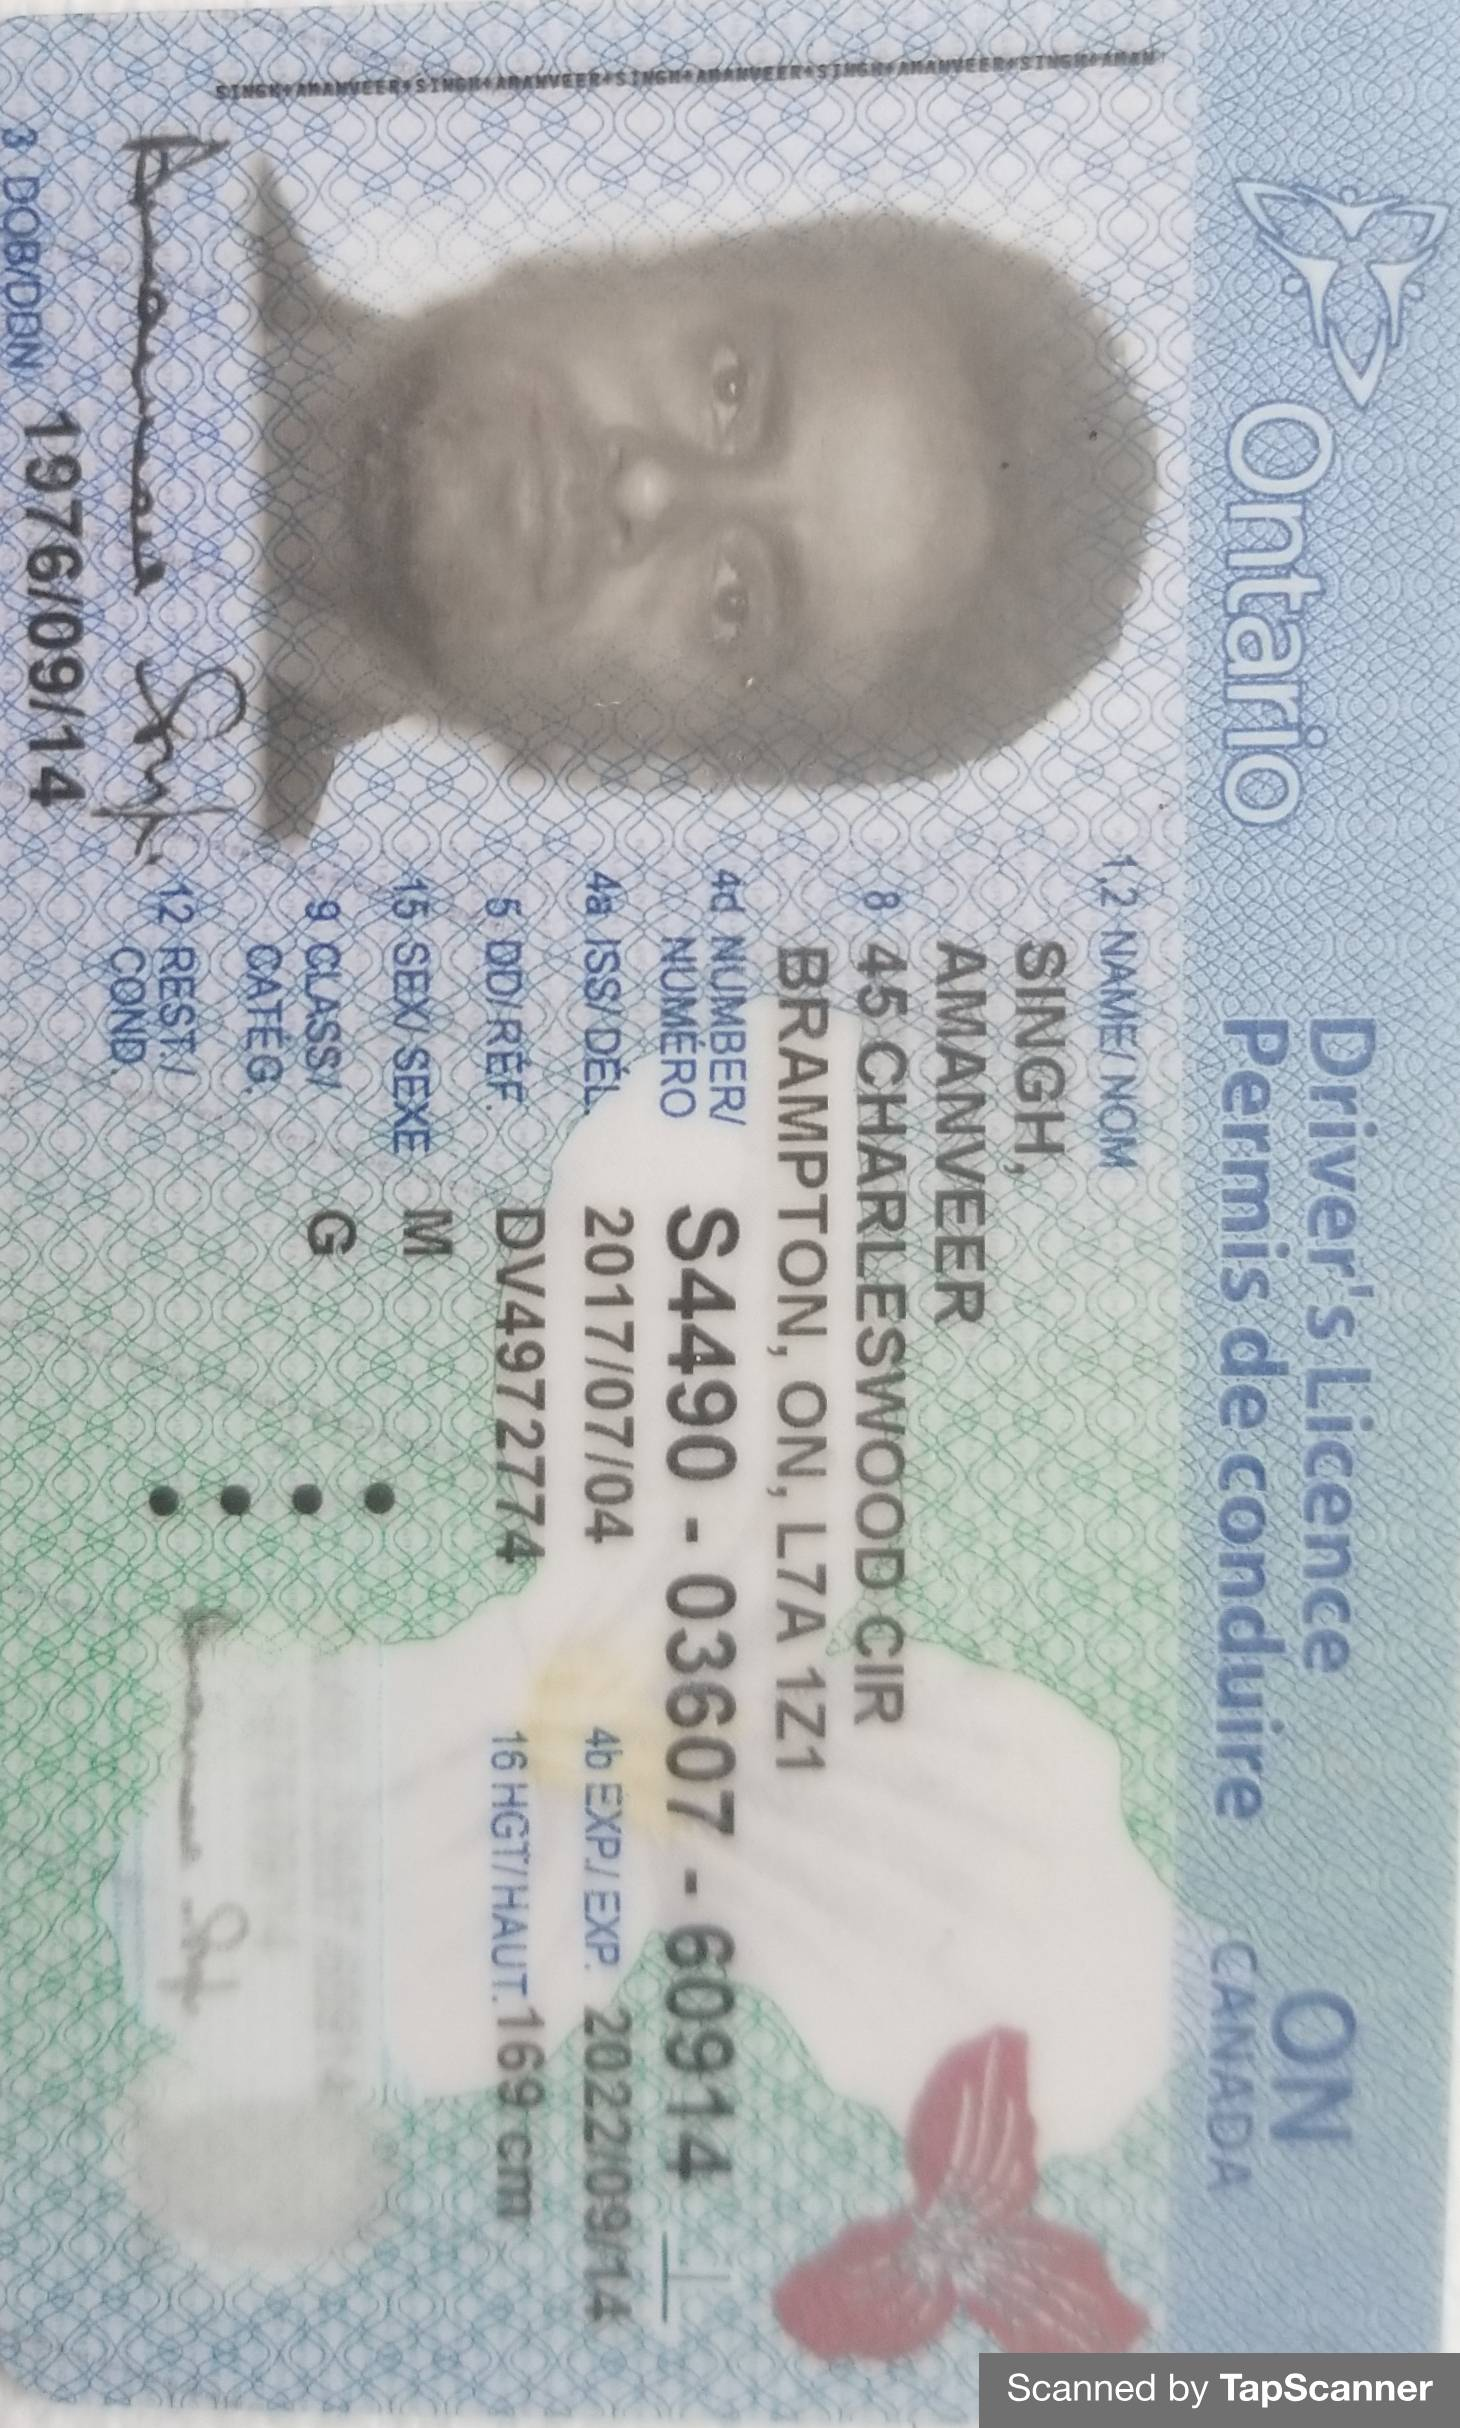

Fields:
Key: 3 DOB/DON, Value: 1976/09/14


In [85]:
# Document
documentName = "DL.jpg"
display(Image(filename=documentName))
# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.analyze_document(Document={'Bytes': imageBytes}, FeatureTypes=["FORMS"])

doc = Document(response)

for page in doc.pages:
    # Print fields
    print("Fields:")
    for field in page.form.fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

In [86]:
print("JSON Response\n===================")
display(response)

JSON Response


{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 0.9984920024871826,
     'Left': 0.0,
     'Top': 0.0015079739969223738},
    'Polygon': [{'X': 1.0, 'Y': 0.0015079739969223738},
     {'X': 1.0, 'Y': 1.0},
     {'X': 0.0, 'Y': 1.0},
     {'X': 0.0, 'Y': 0.0019546637777239084}]},
   'Id': '47b12352-ba9e-4e5f-9171-39d6aa93902f',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['76072397-7974-4985-8071-bb350fb8c0f7',
      '5fec75dc-e87d-4e9b-9893-21b51cef254d',
      '812ed4d2-013d-467a-9202-be85534d9b4c',
      '5b2c82b5-90d5-41da-862e-353a078e96ff',
      'a8c6e626-9259-46ce-bfbb-ca2062db120c',
      '4fde8a6a-4f31-4822-be0e-77e58499e386',
      '28270557-43f7-4c0e-aedb-9a1addf8ad28',
      '959562a1-e4f7-4df0-b5d6-aecf02f3c54b',
      'f33f3c81-cd14-4089-84a6-8c1bbb360915',
      '85ecdb85-0290-447e-b5b9-b3a285a0fece',
      '0f8eea39-a857-4fdb-86f8-d017cbe49ebc',
      'b2b0066e-c829-4fae-b01d-b160823

https://github.com/aws-samples/amazon-textract-response-parser

https://github.com/aws-samples/amazon-textract-response-parser/blob/master/src-python/trp.py

# 9. Control and Compliance - Redaction

In [87]:
# Document
documentName = "DL.jpg"

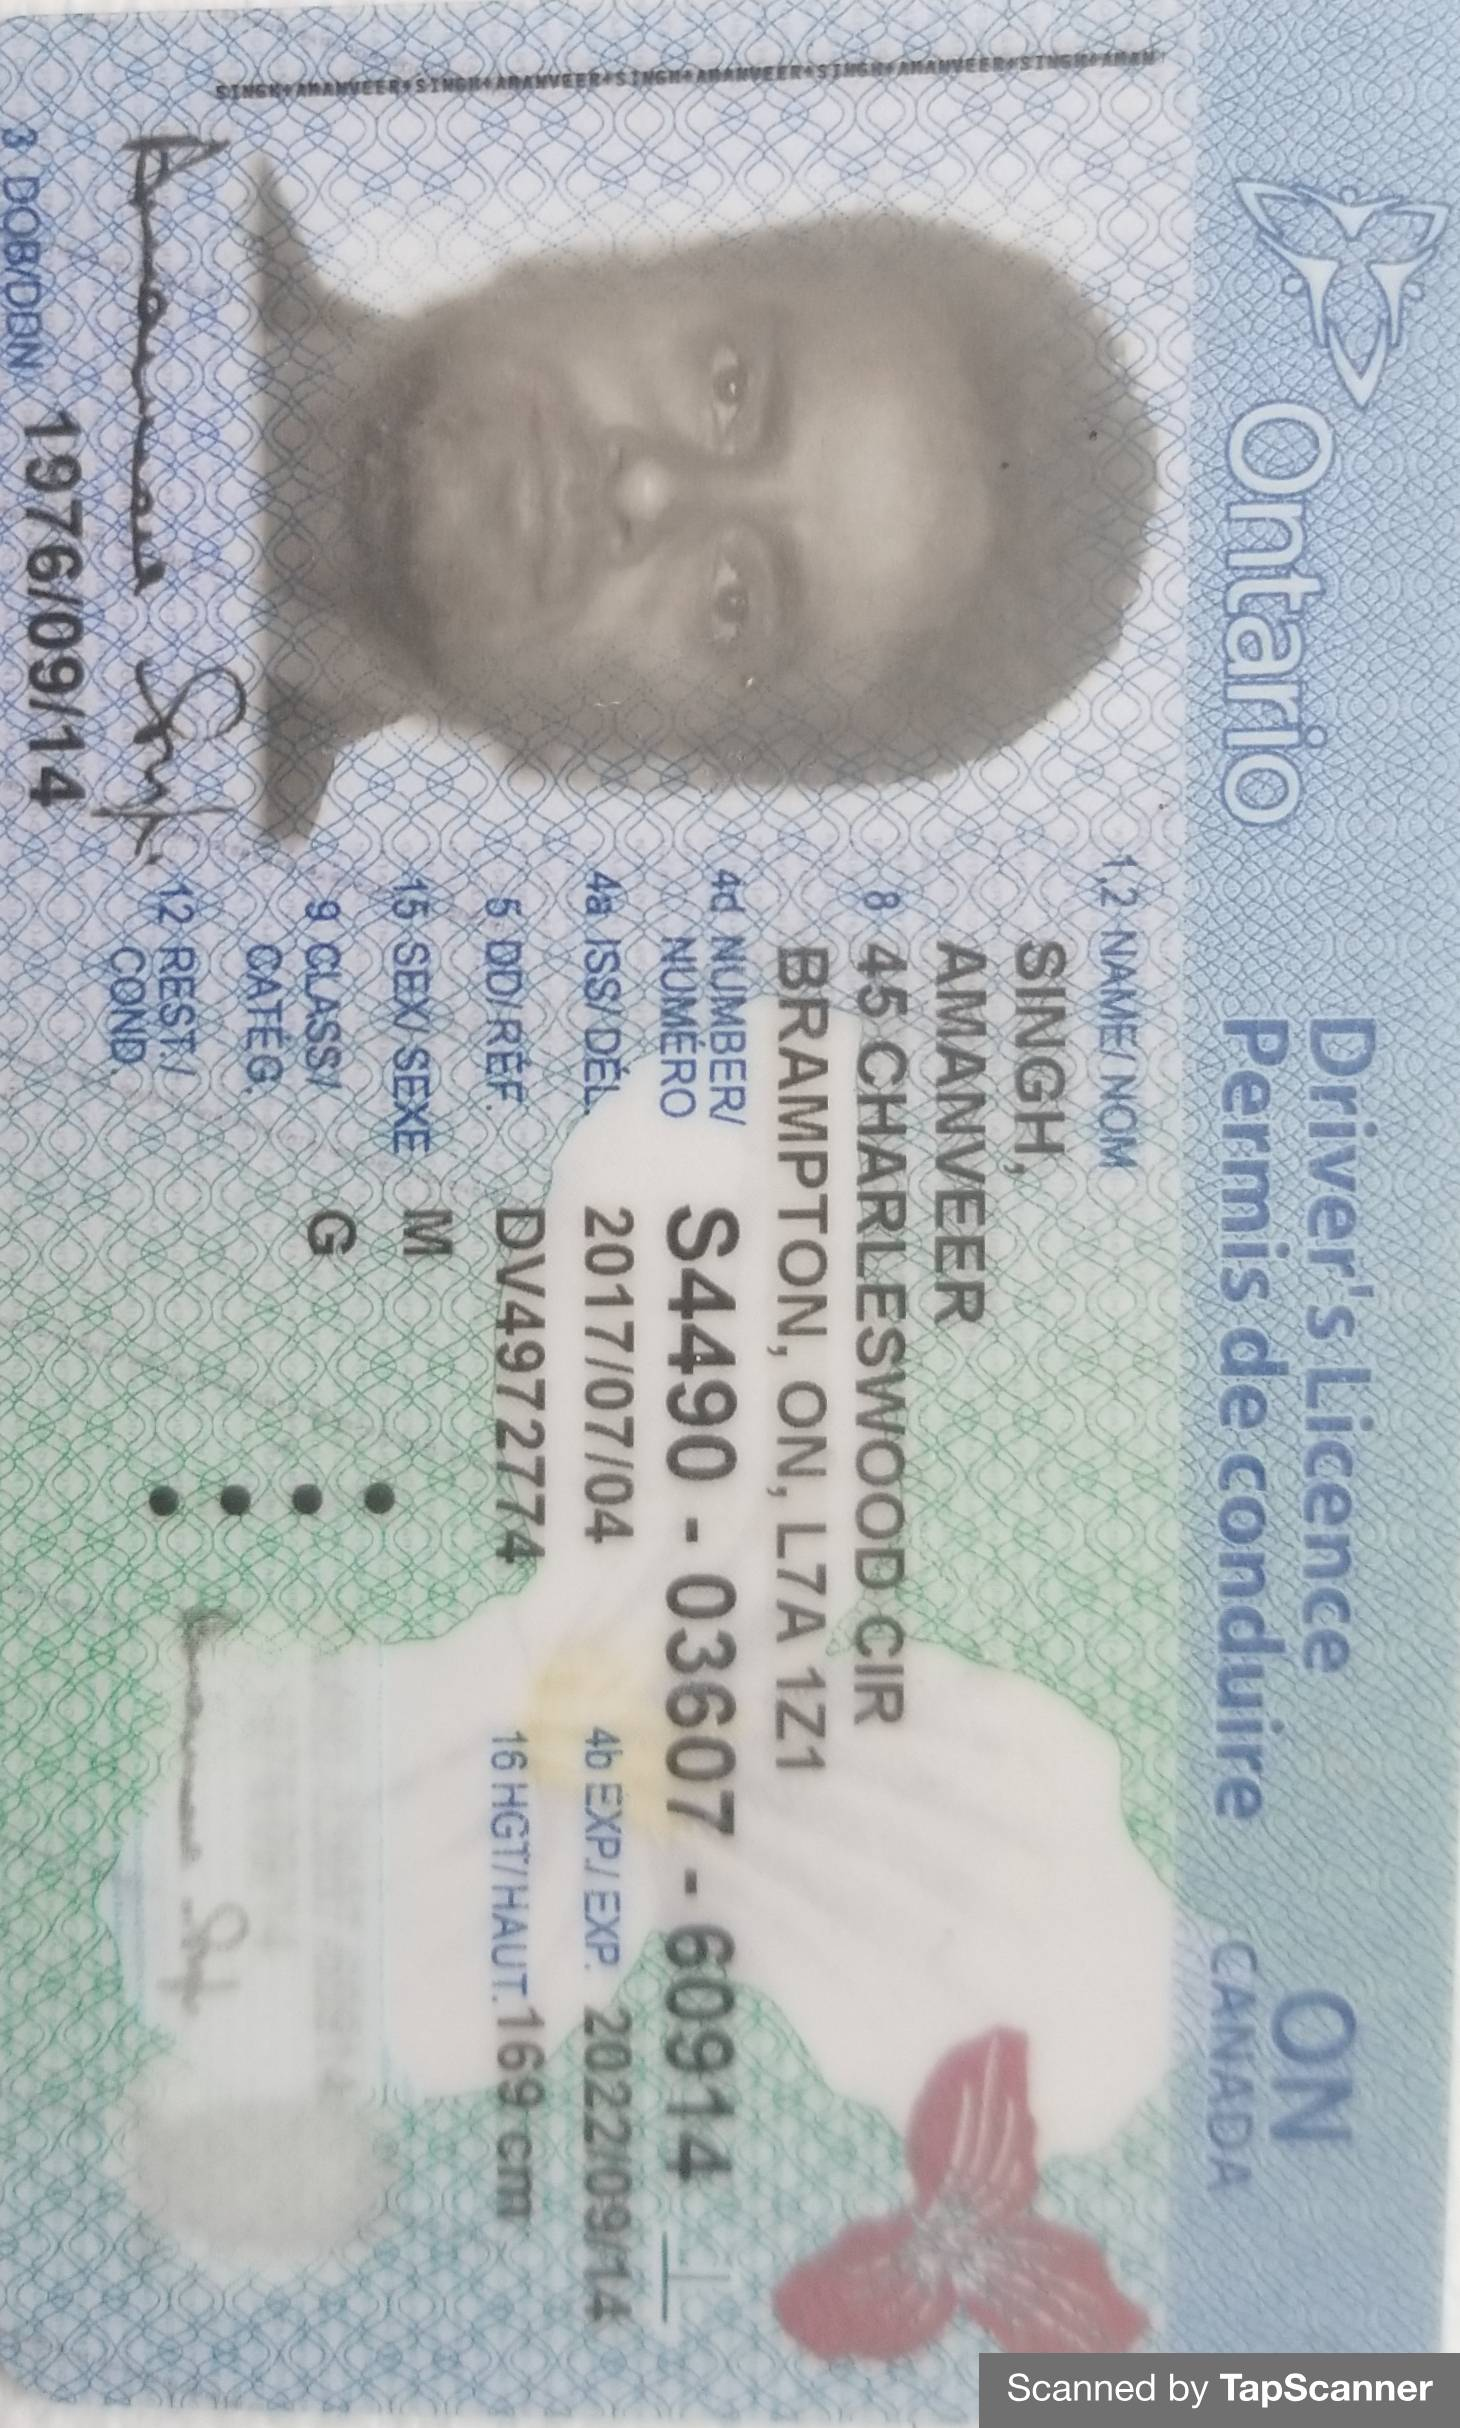

In [88]:
display(Image(filename=documentName))

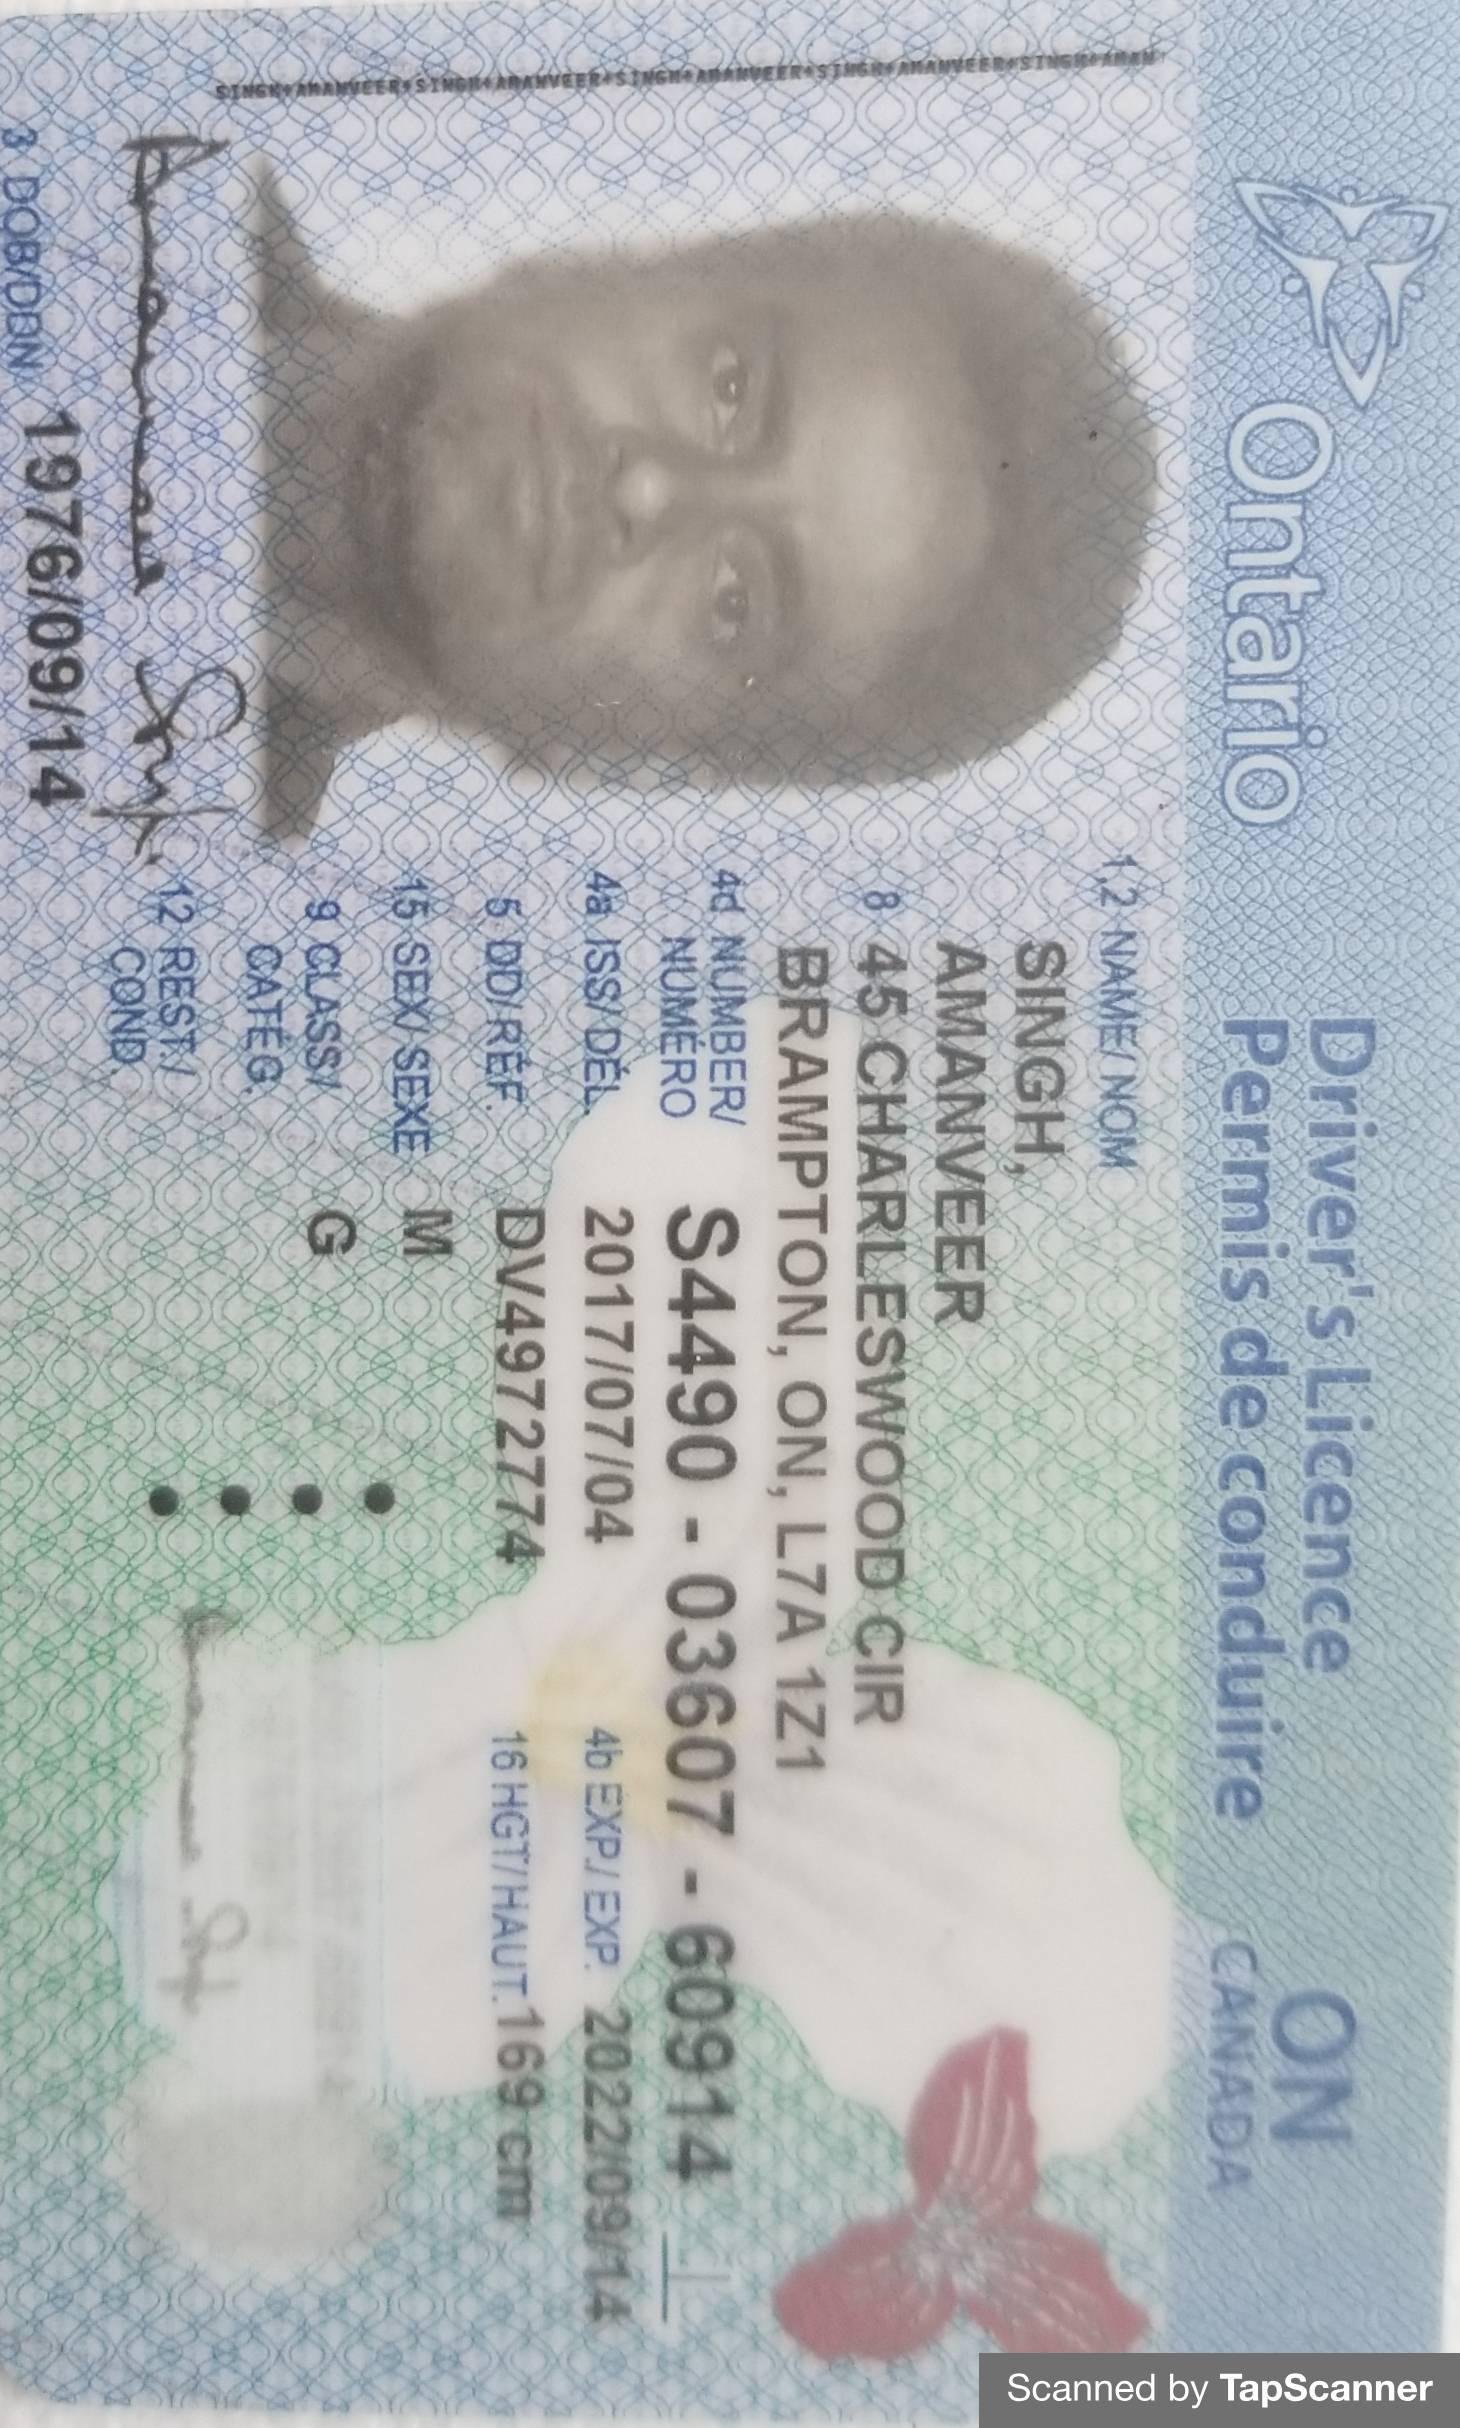

In [89]:
# Call Amazon Textract
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.analyze_document(Document={'Bytes': imageBytes}, FeatureTypes=["FORMS"])

#print(response)

doc = Document(response)

# Redact document
img = PImage.open(documentName)

width, height = img.size

if(doc.pages):
    page = doc.pages[0]
    for field in page.form.fields:
        if(field.key and field.value and "address" in field.key.text.lower()):
            print("Redacting => Key: {}, Value: {}".format(field.key.text, field.value.text))
            
            x1 = field.value.geometry.boundingBox.left*width
            y1 = field.value.geometry.boundingBox.top*height-2
            x2 = x1 + (field.value.geometry.boundingBox.width*width)+5
            y2 = y1 + (field.value.geometry.boundingBox.height*height)+2

            draw = ImageDraw.Draw(img)
            draw.rectangle([x1, y1, x2, y2], fill="Black")

outputDocumentName = "redacted-{}".format(documentName)
img.save(outputDocumentName)
display(Image(filename=outputDocumentName))

# 10. Tables

In [92]:
# Document
documentName = "textract/SampleLiabilityInsuranceForm.png"

In [93]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [94]:
# Call Amazon Textract
response = textract.analyze_document(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    },
    FeatureTypes=["TABLES"])

#print(response)

doc = Document(response)

for page in doc.pages:
     # Print tables
    for table in page.tables:
        for r, row in enumerate(table.rows):
            for c, cell in enumerate(row.cells):
                print("Table[{}][{}] = {}".format(r, c, cell.text))

Table[0][0] = THE 
Table[0][1] = POLICIES OF INSURANCE LISTED ANY REGUIREMENT TERM OR MAY PERT. AIN. THE INSURANCE POLICIES AGGREGATE LIMITS SHOWN 
Table[0][2] = BELOW HAVE BEEN ISSUED TO THE CONDITION OF ANY CONTRACT OR OTHER AFFORDED BY THE POLICHS DESCRIBED MAY HAVE BEEN REDUCED BY PAID 
Table[0][3] = INSURED NAMED DOCUMENT WITH HEREN is SUBJECT CLAIMS 
Table[0][4] = ABOVE FOR THE POLICY RESPECT TO TO ALL THE TERMS 
Table[0][5] = PERIOD INDICATED WHICH THIS CERTIFICATE EXCLUSIONS AND 
Table[0][6] = NOTWITHST ANDING MAY st ISSUED OR CONDITIONS OF SUCH 
Table[1][0] = 
Table[1][1] = INSURANCE 
Table[1][2] = POLIOY NUMBER 
Table[1][3] = 
Table[1][4] = BATE 
Table[1][5] = LIMITS 
Table[1][6] = 
Table[2][0] = A 
Table[2][1] = GENERAL 
Table[2][2] = Your Policy No. 
Table[2][3] = 00/00/00 
Table[2][4] = 00/00/00 
Table[2][5] = LACH ODCUMPENCE 
Table[2][6] = 9 1000000 
Table[3][0] = 
Table[3][1] = SELECTED, DENERAL 
Table[3][2] = 
Table[3][3] = 
Table[3][4] = 
Table[3][5] = APE DAMAGE (Any 

# Table JSON Structure

https://docs.aws.amazon.com/textract/latest/dg/how-it-works-tables.html

# 11. Table Data Validation

In [95]:
# Document
documentName = "textract/SampleLiabilityInsuranceForm.png"

In [96]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [97]:
# Call Amazon Textract
response = textract.analyze_document(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    },
    FeatureTypes=["TABLES"])

#print(response)

doc = Document(response)

def isFloat(input):
  try:
    float(input)
  except ValueError:
    return False
  return True

warning = ""
for page in doc.pages:
     # Print tables
    for table in page.tables:
        for r, row in enumerate(table.rows):
            itemName  = ""
            for c, cell in enumerate(row.cells):
                print("Table[{}][{}] = {}".format(r, c, cell.text))
                if(c == 0):
                    itemName = cell.text
                elif(c == 4 and isFloat(cell.text)):
                    value = float(cell.text)
                    if(value > 1000):
                        warning += "{} is greater than $1000.".format(itemName)
if(warning):
    print("\nReview needed:\n====================\n" + warning)

Table[0][0] = THE 
Table[0][1] = POLICIES OF INSURANCE LISTED ANY REGUIREMENT TERM OR MAY PERT. AIN. THE INSURANCE POLICIES AGGREGATE LIMITS SHOWN 
Table[0][2] = BELOW HAVE BEEN ISSUED TO THE CONDITION OF ANY CONTRACT OR OTHER AFFORDED BY THE POLICHS DESCRIBED MAY HAVE BEEN REDUCED BY PAID 
Table[0][3] = INSURED NAMED DOCUMENT WITH HEREN is SUBJECT CLAIMS 
Table[0][4] = ABOVE FOR THE POLICY RESPECT TO TO ALL THE TERMS 
Table[0][5] = PERIOD INDICATED WHICH THIS CERTIFICATE EXCLUSIONS AND 
Table[0][6] = NOTWITHST ANDING MAY st ISSUED OR CONDITIONS OF SUCH 
Table[1][0] = 
Table[1][1] = INSURANCE 
Table[1][2] = POLIOY NUMBER 
Table[1][3] = 
Table[1][4] = BATE 
Table[1][5] = LIMITS 
Table[1][6] = 
Table[2][0] = A 
Table[2][1] = GENERAL 
Table[2][2] = Your Policy No. 
Table[2][3] = 00/00/00 
Table[2][4] = 00/00/00 
Table[2][5] = LACH ODCUMPENCE 
Table[2][6] = 9 1000000 
Table[3][0] = 
Table[3][1] = SELECTED, DENERAL 
Table[3][2] = 
Table[3][3] = 
Table[3][4] = 
Table[3][5] = APE DAMAGE (Any 

# 12. PDF Processing

https://docs.aws.amazon.com/textract/latest/dg/API_StartDocumentTextDetection.html
https://docs.aws.amazon.com/textract/latest/dg/API_GetDocumentTextDetection.html
https://docs.aws.amazon.com/textract/latest/dg/API_StartDocumentAnalysis.html
https://docs.aws.amazon.com/textract/latest/dg/API_GetDocumentAnalysis.html

In [98]:
def startJob(s3BucketName, objectName):
    response = None
    response = textract.start_document_text_detection(
    DocumentLocation={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': objectName
        }
    })

    return response["JobId"]

def isJobComplete(jobId):
    response = textract.get_document_text_detection(JobId=jobId)
    status = response["JobStatus"]
    print("Job status: {}".format(status))

    while(status == "IN_PROGRESS"):
        time.sleep(5)
        response = textract.get_document_text_detection(JobId=jobId)
        status = response["JobStatus"]
        print("Job status: {}".format(status))

    return status

def getJobResults(jobId):

    pages = []
    response = textract.get_document_text_detection(JobId=jobId)
    
    pages.append(response)
    print("Resultset page recieved: {}".format(len(pages)))
    nextToken = None
    if('NextToken' in response):
        nextToken = response['NextToken']

    while(nextToken):
        response = textract.get_document_text_detection(JobId=jobId, NextToken=nextToken)

        pages.append(response)
        print("Resultset page recieved: {}".format(len(pages)))
        nextToken = None
        if('NextToken' in response):
            nextToken = response['NextToken']

    return pages

In [99]:
# Document
documentName = "textract/Federal TD1 - 2020.pdf"

In [100]:
IFrame(s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName}), 900, 400)

In [101]:
jobId = startJob(s3BucketName, documentName)
print("Started job with id: {}".format(jobId))
if(isJobComplete(jobId)):
    response = getJobResults(jobId)

#print(response)

# Print detected text
for resultPage in response:
    for item in resultPage["Blocks"]:
        if item["BlockType"] == "LINE":
            print ('\033[94m' +  item["Text"] + '\033[0m')

Started job with id: 6807d643559646d184533eeec6a2a38ea5d34e4f2fa11147fb4072f2b20e4b8e
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: SUCCEEDED
Resultset page recieved: 1
Resultset page recieved: 2
Resultset page recieved: 3
11/18/2020
Dayforce
Canada Revenue
Agence du revenu
Protected B when completed
Agency
du Canada
2020 Personal Tax Credits Return
TD1
Read page 2 before filling out this form. Your employer or payer will use this form to determine the amount of your tax deductions.
Fill out this form based on the best estimate of your circumstances.
If you do not fill out this form, your tax deductions will only include the basic personal amount, estimated by your employer or payer based on the income
they pay you.
Last name
First name and initial(s)
Date of birth (YYYY/MM/DD)
Employee number
Singh
Amanveer
1976/09/14
108325384
Address
Postal code
For non-residents only -
Social insurance number
Country of permanent residen